In [1]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import math
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

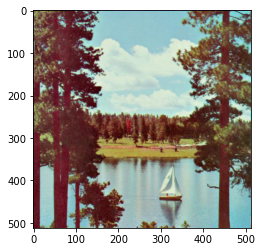

In [2]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [3]:
def reshape_kernel(kernel):
    rotated_kernel = list(zip(*kernel))[::-1]
    new_kernel = np.zeros((len(rotated_kernel[0]), len(rotated_kernel[0]), 3))
    for i, row in enumerate(rotated_kernel):
        for j, col in enumerate(rotated_kernel[i]):
            new_kernel[i][j] = np.array([rotated_kernel[i][j]]*3)
    return new_kernel

In [4]:
def convolve_im(im, kernel):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3
    
    kernel_len = len(kernel[0])
    center = math.floor(kernel_len/2) # 0-indexing
    re_kernel = reshape_kernel(kernel)
    
    npad =  ((center, center), (center, center), (0, 0))
    padded_im = np.pad(im,  pad_width=npad, mode='constant', constant_values=0)
        
    for i, row in enumerate(im):
        for j, col in enumerate(im[i]):
            im_slice = padded_im[i:i+kernel_len, j:j+kernel_len]
            im[i][j] = sum(sum(im_slice * re_kernel))
            
    return im2

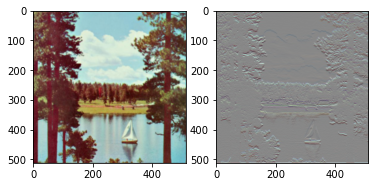

In [5]:
if __name__ == "__main__":
    # Define the convolutional kernels
    h_b = 1 / 256  * np.array([
        [1, 4, 6, 4, 1],
        [4, 16, 24, 16, 4],
        [6, 24, 36, 24, 6],
        [4, 16, 24, 16, 4],
        [1, 4, 6, 4, 1]
    ])
    sobel_x = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    # Convolve images
    im_smoothed = convolve_im(im.copy(), h_b)
    save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
    im_sobel = convolve_im(im, sobel_x)
    save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

    # DO NOT CHANGE. Checking that your function returns as expected
    assert isinstance(im_smoothed, np.ndarray),         f"Your convolve function has to return a np.array. " +        f"Was: {type(im_smoothed)}"
    assert im_smoothed.shape == im.shape,         f"Expected smoothed im ({im_smoothed.shape}" +         f"to have same shape as im ({im.shape})"
    assert im_sobel.shape == im.shape,         f"Expected smoothed im ({im_sobel.shape}" +         f"to have same shape as im ({im.shape})"
    plt.subplot(1, 2, 1)
    plt.imshow(normalize(im_smoothed))

    plt.subplot(1, 2, 2)
    plt.imshow(normalize(im_sobel))
    plt.show()